# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset 1

In [ ]:
df = pd.read_csv('https://drive.google.com/u/0/uc?id=1Aibzqt8xzDBIuNSeLyOMJK43-afO0UVq&export=download')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df.shape

(5043, 28)

In [ ]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

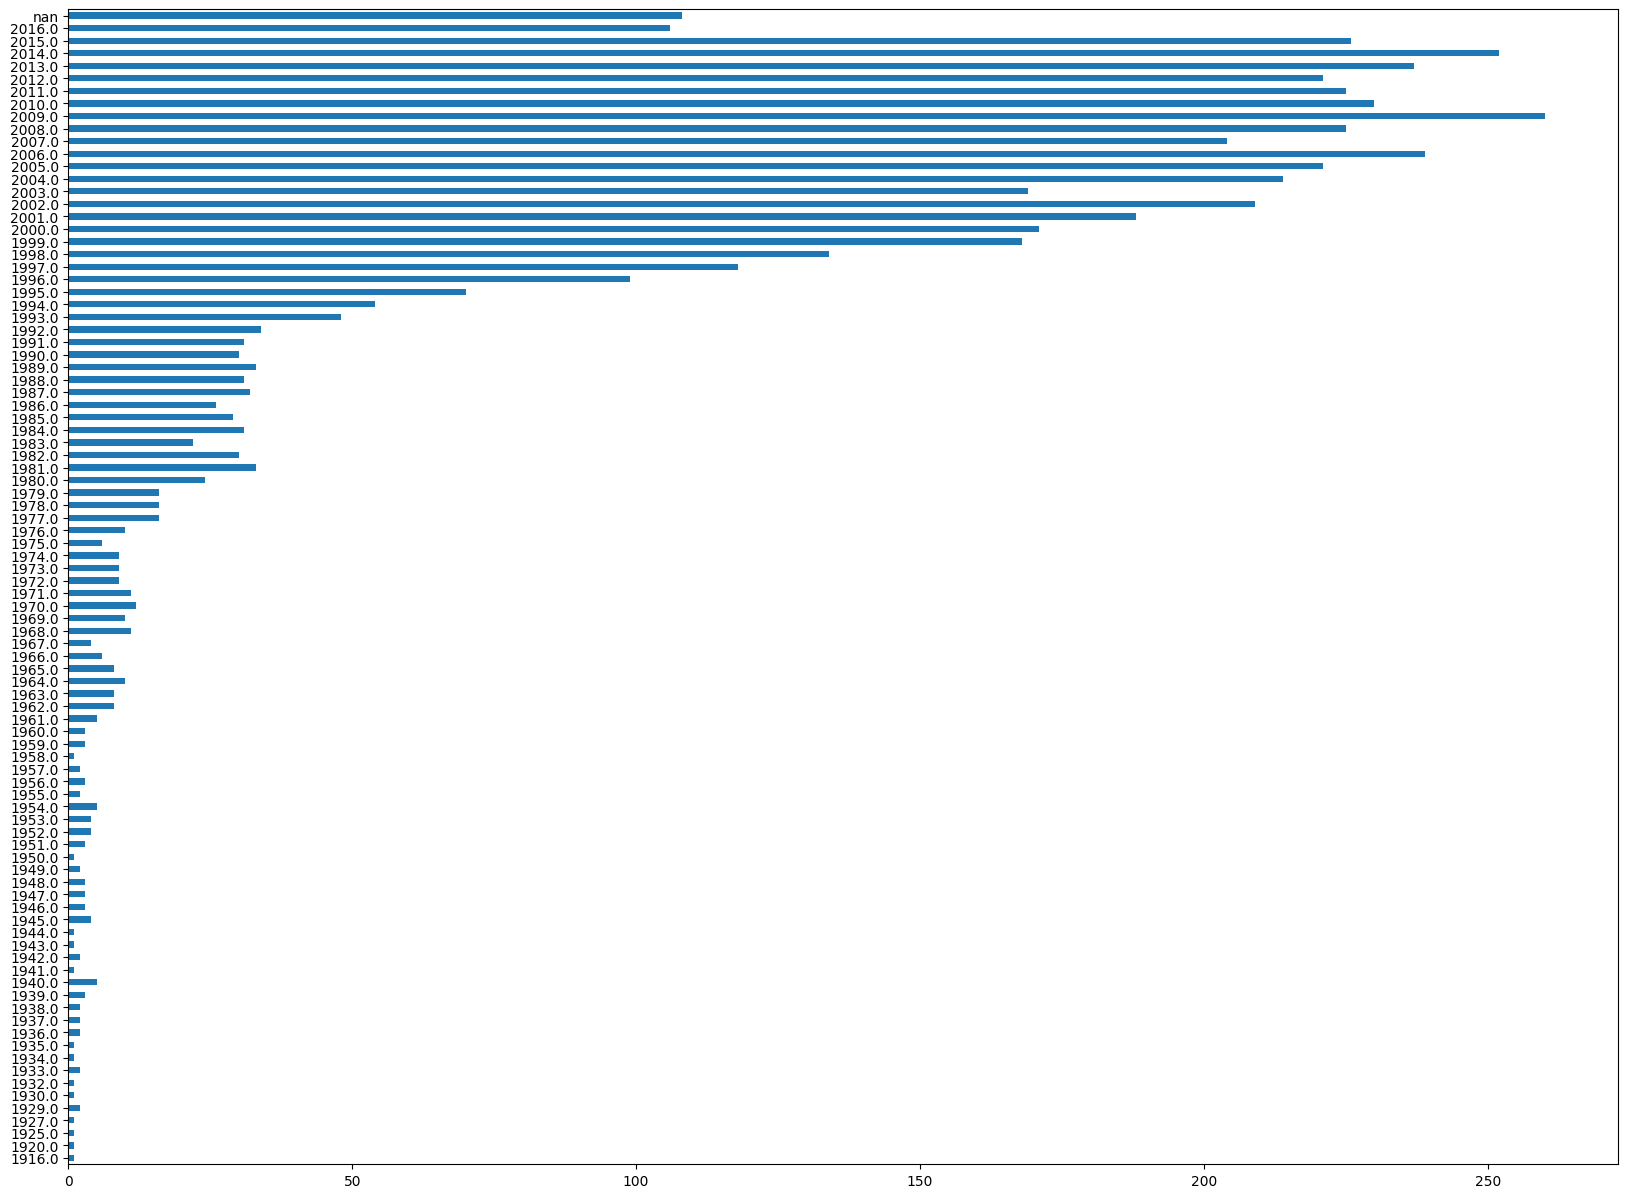

In [ ]:
df.title_year.value_counts(dropna=False).sort_index().plot(kind='barh', figsize=(20,15))
plt.show()

**As you can see we have data till 2016 only**

In [ ]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

**Let's just select only those attributes that we need**

In [ ]:
data = df.loc[:, ['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [ ]:
data.isna().sum()

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             0
movie_title        0
dtype: int64

In [ ]:
data.fillna('Unknown', inplace=True)

In [ ]:
data.genres = data.genres.str.replace('|', ' ')

<ipython-input-446-cac5920442c1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.genres = data.genres.str.replace('|', ' ')


In [ ]:
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [ ]:
# lowercasing all movie titles
data.movie_title = data.movie_title.str.lower()

In [ ]:
data.movie_title[0]

'avatar\xa0'

In [ ]:
#stripping the unwanted characters from the name
data.movie_title = data.movie_title.apply(lambda x: x[:-1])

In [ ]:
data.movie_title[0]

'avatar'

In [ ]:
data['comb'] = data['actor_1_name'] + ' ' + data['actor_2_name'] + ' ' + data['actor_3_name'] + ' ' + data['director_name'] + ' ' + data['genres']
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker Unknown Doug Walker Doc...


**Saving our dataset**

In [ ]:
data.to_csv('dataset1.csv', index=False)

# Dataset 2

In [ ]:
credits = pd.read_csv('https://drive.google.com/u/0/uc?id=1E5wG_ALmNM4vTFQ1o2ts_XNm6j7cer-N&export=download&confirm=t&uuid=d79ed9bd-3f55-41a7-87d5-1d0f03a1b9e0&at=AB6BwCCGZ20KwkuDu7WrMxshachu:1701920984706')
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
meta = pd.read_csv('https://drive.google.com/u/0/uc?id=1OIXP6sY9gcL75TPDNylFh9xOgY4hLOQv&export=download')
meta.head()

<ipython-input-385-315d2dfd07e7>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('https://drive.google.com/u/0/uc?id=1OIXP6sY9gcL75TPDNylFh9xOgY4hLOQv&export=download')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')

In [ ]:
meta['year'] = meta['release_date'].dt.year

In [ ]:
meta['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

In [ ]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
# Getting only 2017 movies as we already have movies up to the year 2016 in data 1 processed file.
# We don't have enough data for the movies from 2018, 2019 and 2020.
# We'll deal with it in the upcoming preprocessing files
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [ ]:
new_meta.head()

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0


In [ ]:
new_meta.dtypes

genres     object
id         object
title      object
year      float64
dtype: object

In [ ]:
new_meta.id = new_meta.id.astype(int)

In [ ]:
new_meta.dtypes

genres     object
id          int64
title      object
year      float64
dtype: object

In [ ]:
data = pd.merge(new_meta, credits, on ='id')

In [ ]:
data.head()

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de..."


In [ ]:
import ast
data.genres = data.genres.apply(lambda x: ast.literal_eval(x))   #literal_eval helps convert string into a list
data.cast = data.cast.apply(lambda x: ast.literal_eval(x))
data.crew = data.crew.apply(lambda x: ast.literal_eval(x))

**Genres**

In [ ]:
def make_genreslist(x):
  genre = []
  st = ' '
  for i in x:
    if i.get('name') == 'Science Fiction':
      scifi = 'Sci-Fi'
      genre.append(scifi)
    else:
      genre.append(i.get('name'))
  if genre==[]:
    return np.nan
  else:
    return (st.join(genre))


In [ ]:
data.genres = data.genres.apply(lambda x: make_genreslist(x))

In [ ]:
data.genres

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres, Length: 531, dtype: object

**Actor 1**

In [ ]:
def get_actor1(x):
  casts = []
  for i in x:
    casts.append(i.get('name'))
  if casts==[]:
    return np.nan
  else:
    return casts[0]

In [ ]:
data['actor_1_name'] = data.cast.apply(lambda x: get_actor1(x))

In [ ]:
data.actor_1_name

0               Johnny Depp
1               Ben Affleck
2           Chris Hemsworth
3               Chris Pratt
4            Pierce Brosnan
               ...         
526          Inka Haapamäki
527    Lou Diamond Phillips
528                     NaN
529          Sridevi Kapoor
530                     NaN
Name: actor_1_name, Length: 531, dtype: object

**Actor 2**

In [ ]:
def get_actor2(x):
  casts =[]
  for i in x:
    casts.append(i.get('name'))
  if casts==[] or len(casts)<=1:
    return np.nan
  else:
    return casts[1]

In [ ]:
data['actor_2_name'] = data.cast.apply(lambda x: get_actor2(x))

In [ ]:
data['actor_2_name']

0       Javier Bardem
1        Henry Cavill
2      Tom Hiddleston
3         Zoe Saldana
4        William Hurt
            ...      
526     Rosa Honkonen
527     Wallace Shawn
528               NaN
529         Sajal Ali
530               NaN
Name: actor_2_name, Length: 531, dtype: object

**Actor 3**

In [ ]:
def get_actor3(x):
  casts = []
  for i in x:
    casts.append(i.get('name'))
  if casts==[] or len(casts)<=2:
    return np.nan
  else:
    return casts[2]

In [ ]:
data['actor_3_name'] = data.cast.apply(lambda x: get_actor3(x))

In [ ]:
data.actor_3_name

0        Geoffrey Rush
1            Gal Gadot
2       Cate Blanchett
3        Dave Bautista
4      Benjamin Walker
            ...       
526     Tiitus Rantala
527        Gina Holden
528                NaN
529     Akshaye Khanna
530                NaN
Name: actor_3_name, Length: 531, dtype: object

**Director**

In [ ]:
def get_director(x):
  dt=[]
  st = ' '
  for i in x:
    if i.get('job') == 'Director':
      dt.append(i.get('name'))
  if dt==[]:
    return np.nan
  else:
    return (st.join(dt))

In [ ]:
data['director_name'] = data.crew.apply(lambda x: get_director(x))

In [ ]:
data.director_name

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [ ]:
new = data.loc[:,['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'genres','title']]

In [ ]:
new.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter


In [ ]:
new.title = new.title.str.lower()

In [ ]:
new.rename(columns = {'title':'movie_title'}, inplace=True)

In [ ]:
new.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres            7
movie_title       0
dtype: int64

In [ ]:
new.dropna(how='any', inplace=True)

In [ ]:
new.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
dtype: int64

In [ ]:
new['comb'] = new.actor_1_name + ' ' + new.actor_2_name + ' ' + new.actor_3_name + ' ' + new.director_name + ' ' + new.genres

In [ ]:
new.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachi...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett ...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gu...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Se...


In [ ]:
old = pd.read_csv('dataset1.csv')
old.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker Unknown Doug Walker Doc...


In [ ]:
movie = old.append(new)

<ipython-input-423-d0c5b086693b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  movie = old.append(new)


In [ ]:
movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker Unknown Doug Walker Doc...


In [ ]:
old.shape

(5043, 7)

In [ ]:
new.shape

(458, 7)

In [ ]:
movie.shape

(5501, 7)

**Saving all data up to 2017**

In [ ]:
movie.to_csv('dataset2.csv', index=False)

# Dataset 3

## List of film in 2018

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df1

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2]
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3]
2,J A N U A R Y,5,Stratton,Momentum Pictures / GFM Films,"Simon West (director); Duncan Falconer, Warren...",[4]
3,J A N U A R Y,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5]
4,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6]
...,...,...,...,...,...,...
71,M A R C H,29,Ready Player One,Warner Bros. Pictures / Village Roadshow Pictu...,"Steven Spielberg (director); Ernest Cline, Zak...",[72]
72,M A R C H,30,Tyler Perry's Acrimony,Lionsgate / Tyler Perry Films,Tyler Perry (director/screenplay); Taraji P. H...,[73]
73,M A R C H,30,God's Not Dead: A Light in Darkness,Pure Flix,Michael Mason (director/screenplay); David A. ...,[74]
74,M A R C H,30,Gemini,Neon,"Aaron Katz (director/screenplay); Lola Kirke, ...",[75]


In [ ]:
df = df1.append(df2.append(df3.append(df4, ignore_index=True), ignore_index=True), ignore_index=True)

<ipython-input-65-54222622a8f2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2.append(df3.append(df4, ignore_index=True), ignore_index=True), ignore_index=True)


In [ ]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],NaN
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3],NaN
2,J A N U A R Y,5,Stratton,Momentum Pictures / GFM Films,"Simon West (director); Duncan Falconer, Warren...",[4],NaN
3,J A N U A R Y,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5],NaN
4,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6],NaN
...,...,...,...,...,...,...,...
274,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions /...,Etan Cohen (director/screenplay); Will Ferrell...,NaN,[167]
275,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,Adam McKay (director/screenplay); Christian Ba...,NaN,[140]
276,D E C E M B E R,25,On the Basis of Sex,Focus Features,Mimi Leder (director); Daniel Stiepleman (scre...,NaN,[233]
277,D E C E M B E R,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfre...",NaN,[266]


As we can see there is no genre column thus we will use API to get that.

### Working With API

In [ ]:
!pip install tmdbv3api

In [ ]:
#get your API Key here: https://www.themoviedb.org/settings/api

from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = 'e59c86242e08bb3866df82702ee3d006'

In [ ]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genres(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result['results']:
      return np.NaN
    else:
      movie_id = result[0].id
      response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
      data_json = response.json()
      if data_json['genres']:
          genre_str = " "
          for i in range(0,len(data_json['genres'])):
              genres.append(data_json['genres'][i]['name'])
          return genre_str.join(genres)
      else:
          return np.NaN

In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genres(str(x)))

In [ ]:
df.head(3)

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,genres
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],NaN,Horror Mystery Thriller
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3],NaN,Thriller Drama
2,J A N U A R Y,5,Stratton,Momentum Pictures / GFM Films,"Simon West (director); Duncan Falconer, Warren...",[4],NaN,Action Thriller


In [ ]:
df_2018 = df[['Title', 'Cast and crew', 'genres']]
df_2018

,Title,Cast and crew,genres
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Western Crime Thriller Drama
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery
...,...,...,...
274,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Mystery Adventure Comedy Crime
275,Vice,Adam McKay (director/screenplay); Christian Ba...,Comedy Drama
276,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Drama History
277,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...",Thriller Crime Drama Action


### Getting Director

In [ ]:
df_2018['Cast and crew'][0]

'Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, Leigh Whannell, Spencer Locke, Caitlin Gerard, Kirk Acevedo, Bruce Davison'

In [ ]:
def get_director(x):
  return x.split(' (director')[0]

In [ ]:
df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))

<ipython-input-80-4838efec492a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))


In [ ]:
df_2018

,Title,Cast and crew,genres,director_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller,Adam Robitel
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama,Lauren Wolkstein
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller,Simon West
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Western Crime Thriller Drama,Warwick Thornton
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery,Jaume Collet-Serra
...,...,...,...,...
274,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Mystery Adventure Comedy Crime,Etan Cohen
275,Vice,Adam McKay (director/screenplay); Christian Ba...,Comedy Drama,Adam McKay
276,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Drama History,Mimi Leder
277,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...",Thriller Crime Drama Action,Karyn Kusama


### Getting Actor 1

In [ ]:
df_2018['Cast and crew'][0]

'Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, Leigh Whannell, Spencer Locke, Caitlin Gerard, Kirk Acevedo, Bruce Davison'

In [ ]:
def get_actor1(x):
  if 'screenplay); ' in x:
    return x.split('screenplay); ')[-1].split(', ')[0]
  else:
    return x.split('acreenplay); ')[-1].split(', ')[0]

In [ ]:
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))

<ipython-input-98-94b1a1569c5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))


In [ ]:
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller,Adam Robitel,Lin Shaye
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama,Lauren Wolkstein,Alex Pettyfer
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller,Simon West,Dominic Cooper
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Western Crime Thriller Drama,Warwick Thornton,Bryan Brown
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery,Jaume Collet-Serra,Liam Neeson
...,...,...,...,...,...
274,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Mystery Adventure Comedy Crime,Etan Cohen,Will Ferrell
275,Vice,Adam McKay (director/screenplay); Christian Ba...,Comedy Drama,Adam McKay,Christian Bale
276,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Drama History,Mimi Leder,Felicity Jones
277,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...",Thriller Crime Drama Action,Karyn Kusama,Nicole Kidman


### Getting Actor 2

In [ ]:
def get_actor2(x):
  if len(x.split('screenplay); ')[-1].split(', '))<2:
    return np.nan
  elif 'acreenplay); ' in x:
    return x.split('acreenplay); ')[-1].split(', ')[1]
  else:
    return x.split('screenplay); ')[-1].split(', ')[1]

In [ ]:
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))

<ipython-input-101-75f2be6b779a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))


In [ ]:
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller,Adam Robitel,Lin Shaye,Angus Sampson
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller,Simon West,Dominic Cooper,Austin Stowell
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Western Crime Thriller Drama,Warwick Thornton,Bryan Brown,Sam Neill
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery,Jaume Collet-Serra,Liam Neeson,Vera Farmiga
...,...,...,...,...,...,...
274,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Mystery Adventure Comedy Crime,Etan Cohen,Will Ferrell,John C. Reilly
275,Vice,Adam McKay (director/screenplay); Christian Ba...,Comedy Drama,Adam McKay,Christian Bale,Amy Adams
276,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Drama History,Mimi Leder,Felicity Jones,Armie Hammer
277,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...",Thriller Crime Drama Action,Karyn Kusama,Nicole Kidman,Sebastian Stan


### Getting Actor 3

In [ ]:
def get_actor3(x):
  if len(x.split('screenplay); ')[-1].split(', '))<3:
    return np.nan
  elif 'acreenplay); ' in x:
    return x.split('acreenplay; ')[-1].split(', ')[2]
  else:
    return x.split('screenplay); ')[-1].split(', ')[2]

In [ ]:
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))

<ipython-input-104-c6969dc4d5e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))


In [ ]:
df_2018.head()

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Western Crime Thriller Drama,Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson


### Preparing Data

In [ ]:
new_df18 = df_2018.loc[:,['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'genres', 'Title']]

In [ ]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,Title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,Insidious: The Last Key
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,The Strange Ones
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,Stratton
3,Warwick Thornton,Bryan Brown,Sam Neill,NaN,Western Crime Thriller Drama,Sweet Country
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,The Commuter
...,...,...,...,...,...,...
274,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,Holmes & Watson
275,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Comedy Drama,Vice
276,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,On the Basis of Sex
277,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Thriller Crime Drama Action,Destroyer


In [ ]:
new_df18.rename(columns={'Title':'movie_title'}, inplace=True)

In [ ]:
new_df18.isna().sum()

director_name     0
actor_1_name      0
actor_2_name     10
actor_3_name     27
genres            0
movie_title       0
dtype: int64

In [ ]:
new_df18.fillna('unknown', inplace=True)

In [ ]:
new_df18['movie_title'] = new_df18['movie_title'].str.lower()

In [ ]:
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']

In [ ]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Ro...
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Alt...
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon...
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Western Crime Thriller Drama,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton...
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume ...
...,...,...,...,...,...,...,...
274,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,holmes & watson,Will Ferrell John C. Reilly Rebecca Hall Etan ...
275,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Comedy Drama,vice,Christian Bale Amy Adams Steve Carell Adam McK...
276,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,on the basis of sex,Felicity Jones Armie Hammer Justin Theroux Mim...
277,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Thriller Crime Drama Action,destroyer,Nicole Kidman Sebastian Stan Toby Kebbell Kary...


## Function to Generate list

In [ ]:
import pandas as pd
import numpy as np
import requests
import bs4 as bs
import urllib.request

In [ ]:
def get_list(link):

  #getting data
  source = urllib.request.urlopen(link).read()
  soup = bs.BeautifulSoup(source,'lxml')

  tables = soup.find_all('table',class_='wikitable sortable')

  df1 = pd.read_html(str(tables[0]))[0]
  df2 = pd.read_html(str(tables[1]))[0]
  df3 = pd.read_html(str(tables[2]))[0]
  df4 = pd.read_html(str(tables[3]))[0]

  #combining datasets
  df = df1.append(df2.append(df3.append(df4, ignore_index=True), ignore_index=True), ignore_index=True)

  #dropping columns with no title
  df.dropna(subset='Title', inplace=True)

  #getting genres with API
  df['genres'] = df['Title'].map(lambda x: get_genres(str(x)))

  #selecting required columns
  new_df = df[['Title','Cast and crew','genres']]

  #getting director name
  new_df['director_name'] = new_df['Cast and crew'].map(lambda x: get_director(x))

  #getting actor1 name
  new_df['actor_1_name'] = new_df['Cast and crew'].map(lambda x: get_actor1(x))

  #getting actor2 name
  new_df['actor_2_name'] = new_df['Cast and crew'].map(lambda x: get_actor2(x))

  #getting actor3 name
  new_df['actor_3_name'] = new_df['Cast and crew'].map(lambda x: get_actor3(x))

  #selecting required columns
  newdf = new_df.loc[:,['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'genres', 'Title']]

  #renaming column
  newdf.rename(columns={'Title':'movie_title'}, inplace=True)

  #replacing nan with unknown
  newdf['actor_2_name'] = newdf['actor_2_name'].replace(np.nan, 'unknown')
  newdf['actor_3_name'] = newdf['actor_3_name'].replace(np.nan, 'unknown')

  #lowercasing movie title
  newdf['movie_title'] = newdf['movie_title'].str.lower()

  #getting comb column
  newdf['comb'] = newdf['actor_1_name'] + ' ' + newdf['actor_2_name'] + ' '+ newdf['actor_3_name'] + ' '+ newdf['director_name'] +' ' + newdf['genres']

  return newdf


### List of 2019

In [ ]:
new_df19 = get_list("https://en.wikipedia.org/wiki/List_of_American_films_of_2019")

<ipython-input-136-21f9ab12642b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2.append(df3.append(df4, ignore_index=True), ignore_index=True), ignore_index=True)
<ipython-input-136-21f9ab12642b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['director_name'] = new_df['Cast and crew'].map(lambda x: get_director(x))
<ipython-input-136-21f9ab12642b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
new_df19.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Horror Thriller Mystery,escape room,Taylor Russell Logan Miller Deborah Ann Woll A...
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama Action Crime,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen...
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver De...
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexand...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil B...


### List of 2020

In [ ]:
new_df20 = get_list("https://en.wikipedia.org/wiki/List_of_American_films_of_2020")

<ipython-input-274-575ed614bb5e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2.append(df3.append(df4, ignore_index=True), ignore_index=True), ignore_index=True)
<ipython-input-274-575ed614bb5e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['director_name'] = new_df['Cast and crew'].map(lambda x: get_director(x))
<ipython-input-274-575ed614bb5e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery,the grudge,Andrea Riseborough Demián Bichir John Cho Nico...
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Horror Science Fiction Action Adventure,underwater,Kristen Stewart Vincent Cassel Jessica Henwick...
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel ...
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,three christs,Richard Gere Peter Dinklage Walton Goggins Jon...
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Crime Thriller Drama,inherit the viper,Josh Hartnett Margarita Levieva Chandler Riggs...
...,...,...,...,...,...,...,...
269,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Family Action Fantasy Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gossel...
270,Paul Greengrass,Tom Hanks,Helena Zengel,unknown,Drama Western Adventure,news of the world,Tom Hanks Helena Zengel unknown Paul Greengras...
271,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina...
272,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald ...


### List of 2021

In [ ]:
new_df21 = get_list("https://en.wikipedia.org/wiki/List_of_American_films_of_2021")

<ipython-input-320-272c26c36088>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2.append(df3.append(df4, ignore_index=True), ignore_index=True), ignore_index=True)
<ipython-input-320-272c26c36088>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['director_name'] = new_df['Cast and crew'].map(lambda x: get_director(x))
<ipython-input-320-272c26c36088>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
new_df21

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Roseanne Liang,Chloë Grace Moretz,Taylor John Smith,Beulah Koale,Horror Action War,shadow in the cloud,Chloë Grace Moretz Taylor John Smith Beulah Ko...
1,Anthony Leone,Amy Cay,Brian Patrick Butler,Michael C. Burgess,Horror,hacksaw,Amy Cay Brian Patrick Butler Michael C. Burges...
2,Ramin Bahrani,Adarsh Gourav,Rajkummar Rao,Priyanka Chopra Jonas,Drama,the white tiger,Adarsh Gourav Rajkummar Rao Priyanka Chopra Jo...
3,Doug Liman,Anne Hathaway,Chiwetel Ejiofor,Stephen Merchant,Comedy Crime Drama,locked down,Anne Hathaway Chiwetel Ejiofor Stephen Merchan...
4,Simon Stone,Carey Mulligan,Ralph Fiennes,Lily James,Drama History,the dig,Carey Mulligan Ralph Fiennes Lily James Simon ...
...,...,...,...,...,...,...,...
356,Matthew Vaughn,Ralph Fiennes,Gemma Arterton,Rhys Ifans,Action Adventure Thriller,the king's man,Ralph Fiennes Gemma Arterton Rhys Ifans Matthe...
357,Joel Coen,Denzel Washington,Frances McDormand,Bertie Carvel,Drama War,the tragedy of macbeth,Denzel Washington Frances McDormand Bertie Car...
358,Denzel Washington,Michael B. Jordan,Chanté Adams,Jalon Christian,Drama Romance,a journal for jordan,Michael B. Jordan Chanté Adams Jalon Christian...
359,Erwin brothers,Zachary Levi,Anna Paquin,Dennis Quaid,Drama,american underdog,Zachary Levi Anna Paquin Dennis Quaid Erwin br...


### List of 2022

In [ ]:
new_df22 = get_list("https://en.wikipedia.org/wiki/List_of_American_films_of_2022")

<ipython-input-320-272c26c36088>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2.append(df3.append(df4, ignore_index=True), ignore_index=True), ignore_index=True)
<ipython-input-320-272c26c36088>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['director_name'] = new_df['Cast and crew'].map(lambda x: get_director(x))
<ipython-input-320-272c26c36088>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
new_df22

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Simon Kinberg,Jessica Chastain,Penélope Cruz,Fan Bingbing,Action Thriller,the 355,Jessica Chastain Penélope Cruz Fan Bingbing Si...
1,Patricia Harris Seeley,Autumn Reeser,Danny Trejo,Antonio Cupo,Family Animation Fantasy Horror,the legend of la llorona,Autumn Reeser Danny Trejo Antonio Cupo Patrici...
2,Asif Akbar,Mickey Rourke,Michael Jai White,unknown,Action Crime Thriller,the commando,Mickey Rourke Michael Jai White unknown Asif A...
3,Edward John Drake,Timothy V. Murphy,Bruce Willis,Rob Gough,Action Adventure Thriller,american siege,Timothy V. Murphy Bruce Willis Rob Gough Edwar...
4,"Matt Bettinelli-Olpin, Tyler Gillett",Melissa Barrera,Mason Gooding,Jenna Ortega,Horror Mystery Thriller,scream,Melissa Barrera Mason Gooding Jenna Ortega Mat...
...,...,...,...,...,...,...,...
307,Kasi Lemmons,Naomi Ackie,Stanley Tucci,Ashton Sanders,Music History Drama,whitney houston: i wanna dance with somebody,Naomi Ackie Stanley Tucci Ashton Sanders Kasi ...
308,Scott Cooper,Christian Bale,Harry Melling,Gillian Anderson,Thriller Mystery Crime,the pale blue eye,Christian Bale Harry Melling Gillian Anderson ...
309,Sarah Polley,Rooney Mara,Claire Foy,Jessie Buckley,Drama,women talking,Rooney Mara Claire Foy Jessie Buckley Sarah Po...
310,Marc Forster,Tom Hanks,Mariana Treviño,Rachel Keller,Comedy Drama,a man called otto,Tom Hanks Mariana Treviño Rachel Keller Marc F...


### List of 2023

In [ ]:
new_df23 = get_list("https://en.wikipedia.org/wiki/List_of_American_films_of_2023")

<ipython-input-320-272c26c36088>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2.append(df3.append(df4, ignore_index=True), ignore_index=True), ignore_index=True)
<ipython-input-320-272c26c36088>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['director_name'] = new_df['Cast and crew'].map(lambda x: get_director(x))
<ipython-input-320-272c26c36088>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
new_df23

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Gerard Johnstone,Allison Williams,Violet McGraw,Amie Donald,Science Fiction Horror,m3gan,Allison Williams Violet McGraw Amie Donald Ger...
1,Brett Donowho,Nicolas Cage,Ryan Kiera Armstrong,unknown,Western,the old way,Nicolas Cage Ryan Kiera Armstrong unknown Bret...
2,Nathan Frankowski,Alice Orr-Ewing,Joe Doyle,Eveline Hall,Horror Fantasy Science Fiction Thriller,the devil conspiracy,Alice Orr-Ewing Joe Doyle Eveline Hall Nathan ...
3,Jean-François Richet,Gerard Butler,Mike Colter,Yoson An,Action Adventure Thriller,plane,Gerard Butler Mike Colter Yoson An Jean-Franço...
4,Calmatic,Tosin Cole,Jacob Latimore,Karen Obilom,Comedy,house party,Tosin Cole Jacob Latimore Karen Obilom Calmati...
...,...,...,...,...,...,...,...
322,Sean Durkin,Zac Efron,Jeremy Allen White,Harris Dickinson,Drama,the iron claw,Zac Efron Jeremy Allen White Harris Dickinson ...
323,Michel Franco,Jessica Chastain,Peter Sarsgaard,Merritt Wever,Action Thriller Crime,memory,Jessica Chastain Peter Sarsgaard Merritt Wever...
324,Blitz Bazawule,Fantasia Barrino,Taraji P. Henson,Danielle Brooks,Drama,the color purple,Fantasia Barrino Taraji P. Henson Danielle Bro...
325,George Clooney,Callum Turner,Joel Edgerton,Peter Guinness,Drama History,the boys in the boat,Callum Turner Joel Edgerton Peter Guinness Geo...


## Combining all datasets

In [ ]:
new_df_till17 = pd.read_csv('dataset2.csv')

In [ ]:
final_df = pd.concat([new_df_till17, new_df18, new_df19, new_df20, new_df21, new_df22, new_df23], axis=0)

In [ ]:
final_df.shape

(7300, 7)

In [ ]:
final_df.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           4
movie_title      0
comb             4
dtype: int64

In [ ]:
final_df.dropna(how='any', inplace=True)

In [ ]:
final_df.shape

(7296, 7)

In [ ]:
final_df.to_csv('final_df.csv', index=False)

# Dataset 4

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score, accuracy_score
import gzip
import pickle

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
dataset = pd.read_csv('reviews.txt', sep= '\t', names = ['reviews', 'comments'])

In [ ]:
dataset

,reviews,comments
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, ..."
6916,0,Ok brokeback mountain is such a horrible movie.


In [ ]:
stopset = set(stopwords.words('english'))

In [ ]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=list(stopset))

In [ ]:
x = vectorizer.fit_transform(dataset.comments)
y = dataset.reviews

In [ ]:
def save_model(obj,filename, protocol=-1):
  with gzip.open(filename, 'wb') as f:
    loaded_object = pickle.dump(obj, f, protocol)

In [ ]:
save_model(vectorizer, 'transform.pkl')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
clf = naive_bayes.MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

In [ ]:
accuracy_score(y_test, clf.predict(x_test))

0.983140655105973

In [ ]:
save_model(clf, 'model.pkl')